In [45]:
import random
import statistics 
import math
import matplotlib.pyplot as plt

In [46]:
crewmateWin = 0.70
imposterWin = 1 - crewmateWin

In [64]:
win = False
loss = []

for nn in range(100):
    
    avgGamesToWin = []
    avgAmountOfWinners = []
    
    crewmateWinPoints = 1 + ((nn * 0.25) / 5)
    imposterWinPoints = crewmateWinPoints + 0.5
    secondStageCrewmateWinPoints = 0 + ((nn * 0.25) / 5)
    secondStageImposterWinPoints = secondStageCrewmateWinPoints + 1
    
    print('---------------------------------------------------')
    print(crewmateWinPoints, imposterWinPoints, secondStageCrewmateWinPoints, secondStageImposterWinPoints)
    
    for x in range(1000):

        players = [['Faizan', 0, 0],
                   ['Jill', 0, 0],
                   ['Vince', 0, 0],
                   ['Roshni', 0, 0],
                   ['Nicole', 0, 0],
                   ['DeJonte', 0, 0],
                   ['Isaac', 0, 0],
                   ['Derick', 0, 0],
                   ['Kazi', 0, 0],
                   ['Shareefa', 0, 0]]

        if win == True:
            win = False

        nextStage = False

        games = 0
        playersTo10 = 0
        numImposters = 2
        crewmateWin = 0.70
        #crewmateWinPoints = 3
        #imposterWinPoints = 3.5

        index10s = []
        playersPassed10 = []

        while win == False:

            imposters = []
            crewmates = []

            imposters = random.sample(players, numImposters)

            for y in range(10):

                if players[y] not in imposters and players[y][2] != 1:

                    crewmates.append(players[y])


            chancesOfWinning = random.random() 
            imposterWin =  chancesOfWinning > crewmateWin

            #print('\nCrewmates', crewmates)
            #print('\nImposters', imposters)

            if chancesOfWinning < crewmateWin:

                for z in range(len(crewmates)):

                    players[players.index(crewmates[z])][1] += crewmateWinPoints

                #print('\nCrewmate Win')

            else:

                for i in range(len(imposters)):

                    players[players.index(imposters[i])][1] += imposterWinPoints

                #print('\nImposter Win')



            if nextStage == False:

                for f in range(len(players)):

                    if players[f][1] >= 10 and players[f][0] not in playersPassed10:

                        playersTo10 += 1
                        players[f][2] = 1 
                        playersPassed10.append(players[f][0])

                        if playersTo10 == 2:

                            nextStage = True
                            numImposters = 1
                            crewmateWin = 0.8
                            crewmateWinPoints = secondStageCrewmateWinPoints
                            imposterWinPoints = secondStageImposterWinPoints

                            '''
                            print('\n', x + 1)
                            print('Games to Win', games)
                            print('First Two Winners:', playersPassed10)
                            print('\n', players)
                            '''
                            break



            playersTo10 = 0

            for g in range(len(players)):

                 if players[g][1] >= 10:

                    playersTo10 += 1

                    if players[g][0] not in playersPassed10:
                        playersPassed10.append(players[g][0])

                    if playersTo10 == 5:

                        win = True

                        '''
                        print('\n', x + 1)
                        print('***Game Over', games)
                        print('Winners:', playersPassed10)
                        print('\n',players)
                        '''

                        avgGamesToWin.append(games)
                        avgAmountOfWinners.append(len(playersPassed10))

                        break


            games += 1



    avgLoss = abs(5 - sum(avgGamesToWin) / len(avgGamesToWin))
    stdevLoss = statistics.stdev(avgGamesToWin)
    avgPlayerAdvLoss = abs(5 - sum(avgAmountOfWinners) / len(avgAmountOfWinners))
    totalLoss = avgLoss + stdevLoss + avgPlayerAdvLoss
    loss.append(totalLoss)
    
    
    print('\nAverage Amount of Games to Advance:', sum(avgGamesToWin) / len(avgGamesToWin))
    print('\nStandard Deviation:', statistics.stdev(avgGamesToWin))
    print('\nTotal Loss:', totalLoss)
    
    
    #print('\nAverage Amount of Players to Advance:', sum(avgAmountOfWinners) / len(avgAmountOfWinners))
    #print('\nChances of 6 Players Advancing:', avgAmountOfWinners.count(6) / len(avgAmountOfWinners))
    #print('\nChances of 7 Players Advancing:', avgAmountOfWinners.count(7) / len(avgAmountOfWinners))

---------------------------------------------------
1.0 1.5 0.0 1.0

Average Amount of Games to Advance: 229.947

Standard Deviation: 50.78325639549053

Total Loss: 275.7302563954905
---------------------------------------------------
1.05 1.55 0.05 1.05

Average Amount of Games to Advance: 119.54

Standard Deviation: 13.80844209435203

Total Loss: 128.37344209435204
---------------------------------------------------
1.1 1.6 0.1 1.1

Average Amount of Games to Advance: 85.087

Standard Deviation: 7.347749343875336

Total Loss: 87.46774934387534
---------------------------------------------------
1.15 1.65 0.15 1.15

Average Amount of Games to Advance: 65.787

Standard Deviation: 4.648574000727561

Total Loss: 65.49957400072756
---------------------------------------------------
1.2 1.7 0.2 1.2

Average Amount of Games to Advance: 54.61

Standard Deviation: 3.2656644905079526

Total Loss: 52.96666449050795
---------------------------------------------------
1.25 1.75 0.25 1.25

Average

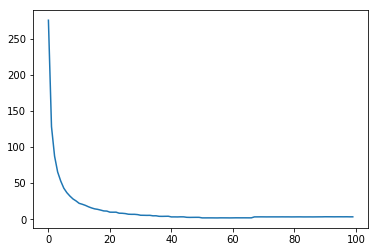

In [65]:
plt.plot(loss)

In [66]:
print(min(loss))

1.826957172529579


## Optimal Game: 

+3.75 Crewmate Points 
+4.25 Imposter Points 
+2.75 Second Stage Crewmate Points
+3.75 Second State Imposter Points

Average Amount of Games to Advance: 4.872

Standard Deviation: 1.1449571725295786

Total Loss: 1.826957172529579